<a href="https://colab.research.google.com/github/Shaadalam9/Shaadalam9/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving train.csv to train (24).csv


In [3]:
import io 
df = pd.read_csv(io.BytesIO(data_to_load['train.csv']))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

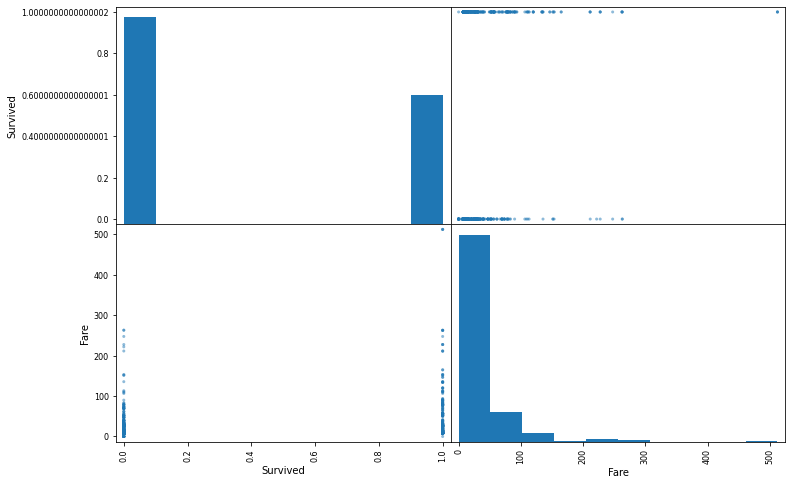

In [6]:
imp_attributes=["Survived","Fare"]
from pandas.plotting import scatter_matrix
scatter_matrix(df[imp_attributes],figsize=(12,8))
plt.show()

In [7]:
df=df.drop("Name",axis=1)

In [8]:
df=df.drop("Ticket",axis=1)
df=df.drop("Cabin",axis=1)
df=df.drop("PassengerId",axis=1)

In [9]:
df_sex=df["Sex"]
df_sex_encoded,df_sex_categories=df_sex.factorize()

In [10]:
df_sex_encoded,df_sex_categories

(array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
        1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 

In [11]:
from sklearn.preprocessing import OneHotEncoder
encoder= OneHotEncoder()
df_sex_1hot=encoder.fit_transform(df_sex_encoded.reshape(-1,1))

In [12]:
df_sex_1hot.toarray()

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [13]:
df_sex_encoded=pd.DataFrame(df_sex_encoded)

In [14]:
df=pd.concat([df,df_sex_encoded],axis=1)

In [15]:
df=df.drop("Sex",axis=1)

In [16]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,0
0,0,3,22.0,1,0,7.2500,S,0
1,1,1,38.0,1,0,71.2833,C,1
2,1,3,26.0,0,0,7.9250,S,1
3,1,1,35.0,1,0,53.1000,S,1
4,0,3,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,0
887,1,1,19.0,0,0,30.0000,S,1
888,0,3,NaN,1,2,23.4500,S,1
889,1,1,26.0,0,0,30.0000,C,0


In [17]:
df_embarked=df["Embarked"]
df_embarked_encoded,df_embarked_categories=df_embarked.factorize()

In [18]:
df_embarked_encoded,df_embarked_categories

(array([ 0,  1,  0,  0,  0,  2,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  2,
         0,  0,  1,  0,  0,  2,  0,  0,  0,  1,  0,  2,  0,  1,  1,  2,  0,
         1,  0,  1,  0,  0,  1,  0,  0,  1,  1,  2,  0,  2,  2,  1,  0,  0,
         0,  1,  0,  1,  0,  0,  1,  0,  0,  1, -1,  0,  0,  1,  1,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  2,  0,  1,  0,  0,  1,  0,  2,  0,  1,
         0,  0,  0,  1,  0,  0,  1,  2,  0,  1,  0,  1,  0,  0,  0,  0,  1,
         0,  0,  0,  1,  1,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  2,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  2,
         0,  2,  0,  0,  0,  0,  0,  1,  1,  2,  0,  2,  0,  0,  0,  0,  1,
         0,  0,  0,  1,  2,  1,  0,  0,  0,  0,  2,  1,  0,  0,  1,  0,  0,
         0, 

In [19]:
df_embarked_encoded=pd.DataFrame(df_embarked_encoded)

In [20]:
df=pd.concat([df,df_embarked_encoded],axis=1)

In [21]:
df=df.drop("Embarked",axis=1)

In [22]:
X = df.iloc[:,3].values
X=X.reshape(-1, 1)
# To calculate mean use imputer class
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(X)
X = imputer.transform(X)

In [23]:
X=pd.DataFrame(X)

In [24]:
df=pd.concat([df,X],axis=1)

In [25]:
df=df.drop("Age",axis=1)

In [26]:
df.columns=["Survived","Pclass","SibSp","Parch","Fare","Sex","Embarked","Age"]

In [27]:
df

,Survived,Pclass,SibSp,Parch,Fare,Sex,Embarked,Age
0,0,3,1,0,7.2500,0,0,1.0
1,1,1,1,0,71.2833,1,1,1.0
2,1,3,0,0,7.9250,1,0,0.0
3,1,1,1,0,53.1000,1,0,1.0
4,0,3,0,0,8.0500,0,0,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,0,0,0.0
887,1,1,0,0,30.0000,1,0,0.0
888,0,3,1,2,23.4500,1,0,1.0
889,1,1,0,0,30.0000,0,1,0.0


In [28]:
x=df.drop("Survived",axis=1)
y=df["Survived"]

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
object = StandardScaler()
x=object.fit_transform(x)

In [31]:
x

array([[ 0.82737724,  0.43279337, -0.47367361, ..., -0.73769513,
        -0.56261872,  0.43279337],
       [-1.56610693,  0.43279337, -0.47367361, ...,  1.35557354,
         1.00392278,  0.43279337],
       [ 0.82737724, -0.4745452 , -0.47367361, ...,  1.35557354,
        -0.56261872, -0.4745452 ],
       ...,
       [ 0.82737724,  0.43279337,  2.00893337, ...,  1.35557354,
        -0.56261872,  0.43279337],
       [-1.56610693, -0.4745452 , -0.47367361, ..., -0.73769513,
         1.00392278, -0.4745452 ],
       [ 0.82737724, -0.4745452 , -0.47367361, ..., -0.73769513,
         2.57046428, -0.4745452 ]])

In [32]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier()
y_pred_forest=cross_val_predict(forest_clf,x,y,cv=3,method="predict_proba")

In [33]:
y_pred_forest

array([[0.98      , 0.02      ],
       [0.02      , 0.98      ],
       [0.84466667, 0.15533333],
       ...,
       [0.3525    , 0.6475    ],
       [0.94      , 0.06      ],
       [0.89774321, 0.10225679]])

In [34]:
forest_clf.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
from google.colab import files
data_to_load = files.upload()

Saving test.csv to test (7).csv


In [36]:
import io 
test = pd.read_csv(io.BytesIO(data_to_load['test.csv']))
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [38]:
test=test.drop("Ticket",axis=1)
test=test.drop("Cabin",axis=1)
test=test.drop("PassengerId",axis=1)
test=test.drop("Name",axis=1)

In [39]:
test_sex=test["Sex"]
test_sex_encoded,test_sex_categories=test_sex.factorize()
test_sex_encoded

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [40]:
test_sex_encoded=pd.DataFrame(test_sex_encoded)

In [41]:
test=pd.concat([test,test_sex_encoded],axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
 7   0         418 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [42]:
test=test.drop("Sex",axis=1)

In [43]:
test_embarked=test["Embarked"]
test_embarked_encoded,test_embarked_categories=test_embarked.factorize()

In [44]:
test_embarked_encoded=pd.DataFrame(test_embarked_encoded)

In [45]:
test=pd.concat([test,test_embarked_encoded],axis=1)

In [46]:
test=test.drop("Embarked",axis=1)

In [47]:
Y = test.iloc[:,4].values
Y=Y.reshape(-1, 1)
# To calculate mean use imputer class
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(Y)
Y = imputer.transform(Y)

In [48]:
Y=pd.DataFrame(Y)

In [49]:
test=pd.concat([test,Y],axis=1)

In [50]:
test=test.drop("Age",axis=1)

In [51]:
test

,Pclass,SibSp,Parch,Fare,0,0,0
0,3,0,0,7.8292,0,0,7.8292
1,3,1,0,7.0000,1,1,7.0000
2,2,0,0,9.6875,0,0,9.6875
3,3,0,0,8.6625,0,1,8.6625
4,3,1,1,12.2875,1,1,12.2875
...,...,...,...,...,...,...,...
413,3,0,0,8.0500,0,1,8.0500
414,1,0,0,108.9000,1,2,108.9000
415,3,0,0,7.2500,0,1,7.2500
416,3,0,0,8.0500,0,1,8.0500


In [52]:
test.columns=["Pclass","SibSp","Parch","Fare","Sex","Embarked","Age"]

In [53]:
test

,Pclass,SibSp,Parch,Fare,Sex,Embarked,Age
0,3,0,0,7.8292,0,0,7.8292
1,3,1,0,7.0000,1,1,7.0000
2,2,0,0,9.6875,0,0,9.6875
3,3,0,0,8.6625,0,1,8.6625
4,3,1,1,12.2875,1,1,12.2875
...,...,...,...,...,...,...,...
413,3,0,0,8.0500,0,1,8.0500
414,1,0,0,108.9000,1,2,108.9000
415,3,0,0,7.2500,0,1,7.2500
416,3,0,0,8.0500,0,1,8.0500


In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   SibSp     418 non-null    int64  
 2   Parch     418 non-null    int64  
 3   Fare      417 non-null    float64
 4   Sex       418 non-null    int64  
 5   Embarked  418 non-null    int64  
 6   Age       418 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [55]:
Z = test.iloc[:,3].values
Z=Z.reshape(-1, 1)
# To calculate mean use imputer class
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(Z)
Z = imputer.transform(Z)

In [56]:
Z=pd.DataFrame(Z)

In [57]:
test=pd.concat([test,Z],axis=1)

In [58]:
test=test.drop("Fare",axis=1)

In [59]:
test

,Pclass,SibSp,Parch,Sex,Embarked,Age,0
0,3,0,0,0,0,7.8292,7.8292
1,3,1,0,1,1,7.0000,7.0000
2,2,0,0,0,0,9.6875,9.6875
3,3,0,0,0,1,8.6625,8.6625
4,3,1,1,1,1,12.2875,12.2875
...,...,...,...,...,...,...,...
413,3,0,0,0,1,8.0500,8.0500
414,1,0,0,1,2,108.9000,108.9000
415,3,0,0,0,1,7.2500,7.2500
416,3,0,0,0,1,8.0500,8.0500


In [60]:
test.columns=["Pclass","SibSp","Parch","Sex","Embarked","Age","Fare"]

In [61]:
test

,Pclass,SibSp,Parch,Sex,Embarked,Age,Fare
0,3,0,0,0,0,7.8292,7.8292
1,3,1,0,1,1,7.0000,7.0000
2,2,0,0,0,0,9.6875,9.6875
3,3,0,0,0,1,8.6625,8.6625
4,3,1,1,1,1,12.2875,12.2875
...,...,...,...,...,...,...,...
413,3,0,0,0,1,8.0500,8.0500
414,1,0,0,1,2,108.9000,108.9000
415,3,0,0,0,1,7.2500,7.2500
416,3,0,0,0,1,8.0500,8.0500


In [62]:
test = test[["Pclass", "SibSp","Parch","Sex","Fare","Embarked","Age"]]

In [63]:
test

,Pclass,SibSp,Parch,Sex,Fare,Embarked,Age
0,3,0,0,0,7.8292,0,7.8292
1,3,1,0,1,7.0000,1,7.0000
2,2,0,0,0,9.6875,0,9.6875
3,3,0,0,0,8.6625,1,8.6625
4,3,1,1,1,12.2875,1,12.2875
...,...,...,...,...,...,...,...
413,3,0,0,0,8.0500,1,8.0500
414,1,0,0,1,108.9000,2,108.9000
415,3,0,0,0,7.2500,1,7.2500
416,3,0,0,0,8.0500,1,8.0500


In [64]:
object1 = StandardScaler()
x_test=object1.fit_transform(test)

In [66]:
ans=forest_clf.predict(x_test)

In [67]:
ans

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [70]:
final = pd.DataFrame(ans)
final.to_excel('Titanic_new.xlsx', sheet_name = 'New_sheet')